In [1]:
import implicit.als as mf
import implicit.evaluation as ev
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sl
import scipy.sparse as sp

In [2]:
n_users = 24
n_items = 24
n_factors = 24
n_sim = 24
n_el = n_users * n_items
results = []
shuffle = False
sparsities = np.arange(0.0, 0.91, 0.01)

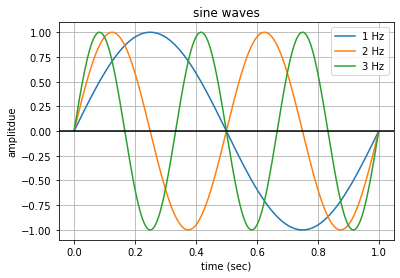

In [3]:
t = np.linspace(0, 1, 1000, endpoint=False)
plt.plot(t, (np.sin(2 * np.pi *  t)), label='1 Hz')
plt.plot(t, (np.sin(2 * np.pi * 2 *  t)), label='2 Hz')
plt.plot(t, (np.sin(2 * np.pi * 3 *  t)), label='3 Hz')
plt.axhline(y=0, color='k')
plt.legend()
plt.ylabel('amplitdue')
plt.xlabel('time (sec)')
plt.title('sine waves')
plt.grid(True)

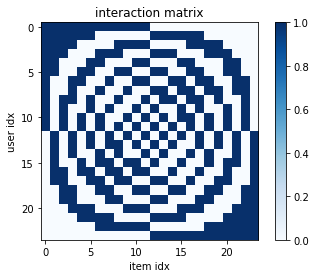

0.5138888888888888

In [4]:
interactions = np.array([
    np.sin(2 * np.pi * f * np.linspace(0, 1, 25, endpoint=False))
    for f in range(25)
])
interactions = np.delete(interactions, 0, axis=0)
interactions = np.delete(interactions, 0, axis=1)
interactions[interactions >= 0.0] = 1.0
interactions[interactions < 0.0] = 0.0

if shuffle:
    np.random.shuffle(interactions)

plt.imshow(interactions, cmap='Blues')
plt.ylabel('user idx')
plt.xlabel('item idx')
plt.title('interaction matrix')
plt.colorbar()
plt.show()

swave_sparsity = 1. - interactions.sum() / (interactions.shape[0] * interactions.shape[1])
swave_sparsity

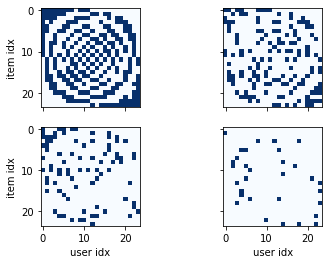

In [5]:
# quick and dirty plotting code
fig, axs = plt.subplots(2, 2)

i = interactions.copy()
r_z = np.random.choice(n_el, replace=False, size=int(n_el * 0.1))
i[np.unravel_index(r_z, (n_users, n_items))] = 0
axs[0, 0].imshow(i, cmap='Blues')

i = interactions.copy()
r_z = np.random.choice(n_el, replace=False, size= int(n_el * 0.5))
i[np.unravel_index(r_z, (n_users, n_items))] = 0
plt.imshow(i, cmap='Blues')
axs[0, 1].imshow(i, cmap='Blues')

i = interactions.copy()
r_z = np.random.choice(n_el, replace=False, size=int(n_el * 0.7))
i[np.unravel_index(r_z, (n_users, n_items))] = 0
plt.imshow(i, cmap='Blues')
axs[1, 0].imshow(i, cmap='Blues')

i = interactions.copy()
r_z = np.random.choice(n_el, replace=False, size=int(n_el * 0.9))
i[np.unravel_index(r_z, (n_users, n_items))] = 0
plt.imshow(i, cmap='Blues')
axs[1, 1].imshow(i, cmap='Blues')

for ax in axs.flat:
    ax.set(xlabel='user idx', ylabel='item idx')
    
for ax in axs.flat:
    ax.label_outer()

In [6]:
for sparsity in sparsities:
    ranking_metrics = []
    for _ in range(n_sim):
        i = interactions.copy()
        n_z = int(n_el * sparsity)
        r_z = np.random.choice(n_el, replace=False, size=n_z)
        i[np.unravel_index(r_z, (n_users, n_items))] = 0
        trn_i, tst_i = ev.train_test_split(sp.csr_matrix(i))
        m = mf.AlternatingLeastSquares(factors=n_factors)
        m.fit(trn_i, show_progress=False)
        e = ev.ranking_metrics_at_k(m, trn_i, tst_i, show_progress=False)
        ranking_metrics.append(e)
    results.append(ranking_metrics)

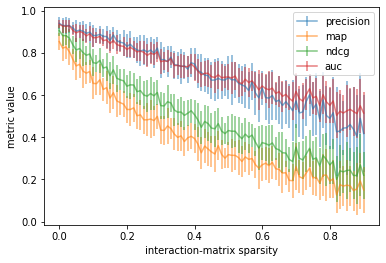

In [7]:
# quick and dirty plotting code
plt.errorbar(
    sparsities, 
    [np.mean([x['precision'] for x in r]) for r in results],
    [np.std([x['precision'] for x in r]) for r in results], alpha=0.6, 
    label='precision'
)
plt.errorbar(
    sparsities, 
    [np.mean([x['map'] for x in r]) for r in results],
    [np.std([x['map'] for x in r]) for r in results], alpha=0.6, 
    label='map'
)
plt.errorbar(
    sparsities, 
    [np.mean([x['ndcg'] for x in r]) for r in results],
    [np.std([x['ndcg'] for x in r]) for r in results], alpha=0.6, 
    label='ndcg'
)
plt.errorbar(
    sparsities, 
    [np.mean([x['auc'] for x in r]) for r in results],
    [np.std([x['auc'] for x in r]) for r in results], alpha=0.6, 
    label='auc'
)
plt.xlabel('interaction-matrix sparsity')
plt.ylabel('metric value')
plt.legend()

In [8]:
m = mf.AlternatingLeastSquares(factors=24)
m.fit(sp.csr_matrix(np.eye(24)), show_progress=False)
np.allclose(m.user_factors, np.linalg.inv(m.item_factors.T), atol=0.01)

True